1) Страны в которых в качестве заемщиков выступают мужчины:
В данной категории лидируют такие страны как: **Нигерия, Палестина, Уганда, Мозамбик.** Лидирующие страны, где наиболее популярными заемщиками будет являться группа людей: **Мали, Камбоджа, Гватемала, Танзания.** (B [7])

2) В отчете была рассмотрена выборка в которую вошли займы с суммой более 5000 долл. США, и наиболее популярными видами деятельности,
на которые выделялись средства являются **Пища, Торговля, Услуги, Сельское хозяйство**, а так же страны с наибольшим количеством крупных займов: **США, Парагвай, Руанда, Конго, Перу.** Получателями займа в данной выборке являются **группы (65%), мужчины (15%) и женщины (20%)**. В числе стран получателей крупных сумм с большим отрывом лидирует США, не смотря на 
тот факт, что США не является страной с развивающейся экономикой, это может быть обусловлено тем, что в США, по сравнению с развивающимися странами и особенно со странами Африканского континента расходы на ведение хозяйства, а так же капитальные затраты существенно выше. (B [8], B [9], B [10])

3) В отчете рассматривалась зависимость между странами (регионами), полом заёмщика и суммой заявки. 
В странах **Латинской Америки и карибского бассейна**, а так же в странах **Центральной Африки** отмечается преобладание 
групп в качестве заемщиков, по размеру суммы выданных займов, суммы займов для подобных заемщиков сосредоточены в интервале
от 1000 до 3000 долл. США, в то время как основная масса сумм займов прочих типов заемщиков (мужчины, женщины) сосредотоены в интервале от 250 до 1500 долл. США, что справедливо и для стран остальных регионов выборки. (B [13])

4) По графику зависимости пола заёмщика от региона планеты
можно определить, что по большинству регионов планеты лидирующим типом заемщиков по количеству выданных займов являются женщины, преобладание данного типа заемщиков не так сильно в странах **Латинской Америки и карибского бассейна** и **Центральной Африки**, но по-прежнему приходится на значительную долю займов (~50%) в этих регионах. Аналогичная тенденция
распространяется и на зависимость пола заёмщика от сектора экономики, за исключением таких видов деятельности как **Собственные нужды** и **Строительство**. (B [15], B [16])

5) В отчете рассматривалось влияние такого атрибута займа, как количество кредиторов (lender_count), на срок погашения займа.
Основная масса займов выдается на срок до 100 месяцев количеством кредиторов до 150, а так же выдача займов на срок 120 месяцев и выше количеством кредиторов до 50. При рассмотрении зависимости количества кредиторов от суммы займов, просматривается отчетливая тенденция увеличения возможного числа кредиторов при повышени суммы займа. Чем выше сумма, тем разнообразнее может
быть колечество кредиторов, выдавшее данный займ. (B [17], B [18])

6) При выявлении влияния показателя MPI (многомерный индекс бедности) в разных странах на суммы займов и сроки погашения
определяется следущее: MPI не влияет на сумму предоставляемого займа, но от него зависит срок погашения займа. Чем ниже
показатель MPI, тем выше по статистике срок погашения займа. (B [19])

7) В отчете проводился поиск корреляций таких метрик, как «Сумма займа», «Срок займа», «Время финансирования заявки», «Ежемесячный платёж» между собой в разрезе макрорегионов. Если не брать во внимание прямые зависимости («Ежемесячный платёж» и «Сумма займа», «Ежемесячный платёж» и «Срок займа»), из результирующих графиков следует, что наиболее длительные сроки возврата платежа присутствуют в странах **Латинской Америки и карибского бассейна**, а так же в странах **Центральной Африки**, не зависимо от суммы займа. (B [21])


In [1]:
import numpy as np
import pandas as pd
import math
import missingno as msno
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set2')

import os
df_kiva_loans = pd.read_csv("kiva_loans.csv")
df_mpi = pd.read_csv("kiva_mpi_region_locations.csv")

In [2]:
df_kiva_loans.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01


In [3]:
df_gen = df_kiva_loans['borrower_genders'].value_counts()
print(df_gen)

female                                                                                                                                                    426502
male                                                                                                                                                      134710
female, female                                                                                                                                             12164
female, female, female                                                                                                                                     11676
female, female, female, female                                                                                                                              9052
                                                                                                                                                           ...  
female, male, male, male, female, 

female    426502
male      134710
group     109993
Name: borrower_genders, dtype: int64


Text(0.5, 1.0, 'Тип заемщищиков')

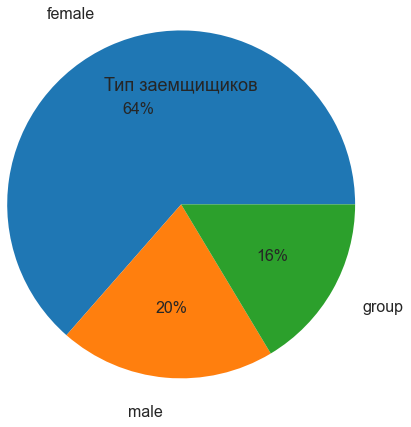

In [4]:
# типы заемщиков, мужчина, женщина, группа людей

df_kiva_loans['borrower_genders'] = [elem if elem in ['female','male'] else 'group' for elem in df_kiva_loans['borrower_genders'] ]

borrowers = df_kiva_loans['borrower_genders'].value_counts()
print(borrowers)
plot = borrowers.plot.pie(fontsize=16, autopct='%1.0f%%', labeldistance=1.2, radius=2)
plt.title("Тип заемщищиков", fontsize=18)

In [5]:
# получение наиболее (статистически) значимых результатов, выделяются страны, которые составляют не менее 0,5% сообщества
# создание серии количества вхождений уникальных значений в выбранный столбец 

countries = df_kiva_loans['country'].value_counts()[df_kiva_loans['country'].value_counts(normalize=True)> 0.005]
list_countries = list(countries.index) 

# структура заёмщиков в разрезе стран
# считаем количество ячеек данных в каждом столбце
df_gender_by_country = \
    df_kiva_loans[df_kiva_loans['country'].isin(countries.index.values)]\
    .groupby(['country', 'borrower_genders'])['borrower_genders']\
    .count()\
    .groupby(level=0).apply(lambda x: 100 * x / x.sum())\
    .unstack('borrower_genders')\
    .fillna(0)\
    .sort_values(by=['female', 'male'])[-20:]

df_gender_by_country = df_gender_by_country[['female', 'male', 'group']]
print(df_gender_by_country)
print(type(df_gender_by_country))

borrower_genders     female       male      group
country                                          
Sierra Leone      57.266851   7.959372  34.773777
Indonesia         58.046347  21.097522  20.856131
Colombia          58.458741  38.008638   3.532621
El Salvador       58.771160  39.791850   1.436991
Lebanon           60.748408  27.070064  12.181529
Armenia           62.368208  37.597034   0.034758
Jordan            63.618910  34.557235   1.823854
Kenya             65.570722  19.564787  14.864491
Zimbabwe          66.633614   3.891919  29.474467
India             67.295542   1.753137  30.951322
Ecuador           72.635160  24.236373   3.128467
Tajikistan        74.182840  25.459653   0.357508
Haiti             74.599226  22.830293   2.570481
Madagascar        78.304109  21.617378   0.078513
Kyrgyzstan        90.872878   9.109803   0.017319
Pakistan          93.327624   3.440444   3.231932
Togo              94.659941   4.853018   0.487041
Philippines       94.728903   5.221234   0.049863


In [6]:
# структура заёмщиков в разрезе стран поэтапно

df_gender_by_country = \
    df_kiva_loans[df_kiva_loans['country'].isin(countries.index.values)]\
    .groupby(['country', 'borrower_genders'])['borrower_genders']\
    .count()  # считаем количество ячеек данных в каждом столбце
print(df_gender_by_country)
print(type(df_gender_by_country))

df_gender_by_country = df_gender_by_country.groupby(level=0).apply(lambda x: 100 * x / x.sum()) #группировка по уровню индексов
print(df_gender_by_country)                                                                     # =0 и приведение к процентному
print(type(df_gender_by_country))                                                               # соотношению

df_gender_by_country = df_gender_by_country.unstack('borrower_genders') #производит датафрейм из мультииндексовой серии c 
print(df_gender_by_country)                                             #указанным индексом
print(df_gender_by_country.info())

df_gender_by_country = df_gender_by_country.fillna(0) #заменяем NA нулями
df_gender_by_country_male = df_gender_by_country.sort_values('male') # страны с преобладанием мужчин в качестве заемщиков
df_gender_by_country_group = df_gender_by_country.sort_values('group') # страны с преобладанием групп в качестве заемщиков

country   borrower_genders
Armenia   female              5383
          group                  3
          male                3245
Bolivia   female              3735
          group               2661
                              ... 
Vietnam   group               4606
          male                 489
Zimbabwe  female              2688
          group               1189
          male                 157
Name: borrower_genders, Length: 114, dtype: int64
<class 'pandas.core.series.Series'>
country   borrower_genders
Armenia   female              62.368208
          group                0.034758
          male                37.597034
Bolivia   female              42.414263
          group               30.218033
                                ...    
Vietnam   group               42.479019
          male                 4.509822
Zimbabwe  female              66.633614
          group               29.474467
          male                 3.891919
Name: borrower_genders, Length: 114

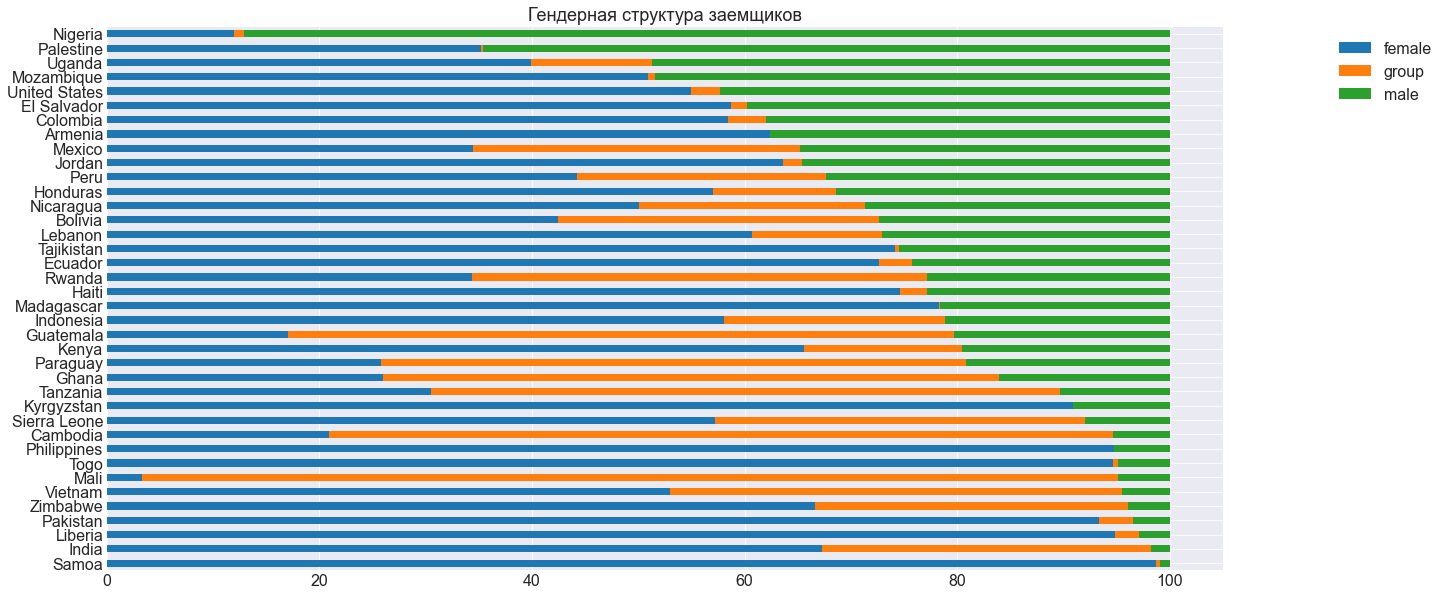

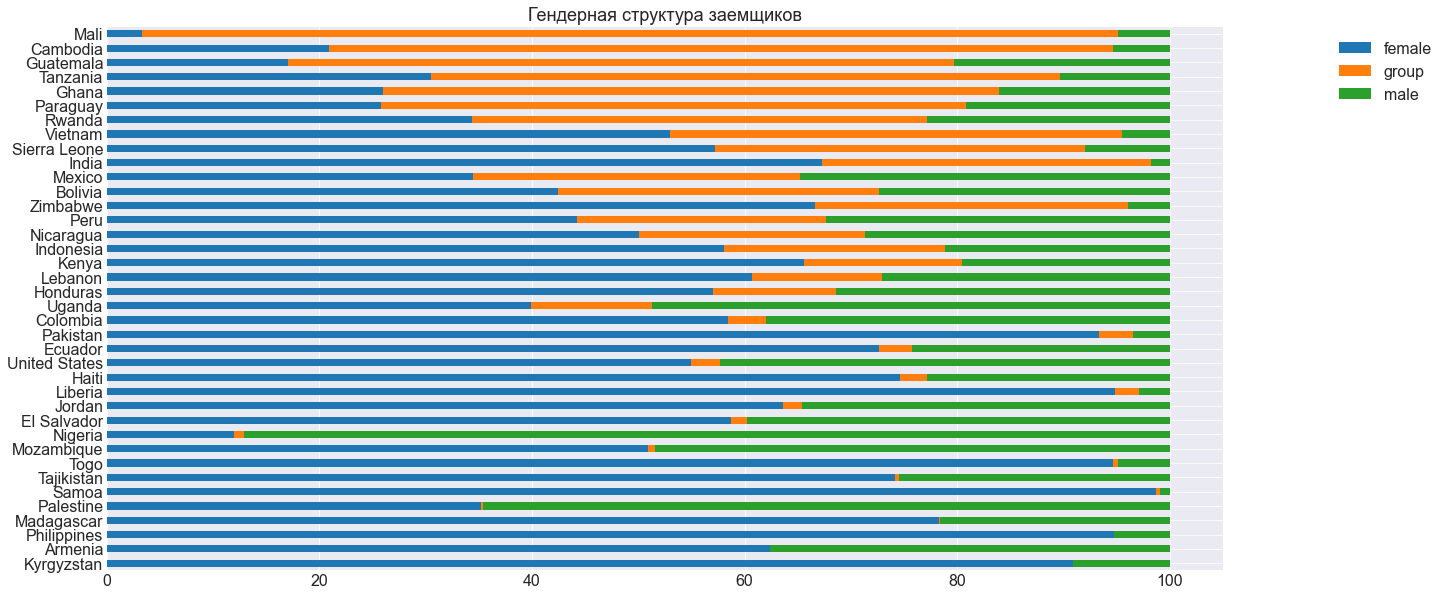

In [7]:
# определение стран, в которых в качестве заемщиков преобладают мужчины

plot = df_gender_by_country_male.plot.barh(
        figsize=(20,10)
        , fontsize=16
        , stacked=True #расположение прямоугольников на одной прямой
        , title='Гендерная структура заемщиков')
plot.title.set_size(18)
plot.legend(loc=1, bbox_to_anchor=(1.2, 1), fontsize=16)
plot.set(ylabel=None, xlabel=None)
plt.show()

# определение стран, в которых в качестве заемщиков преобладают группы

plot = df_gender_by_country_group.plot.barh(
        figsize=(20,10)
        , fontsize=16
        , stacked=True #расположение прямоугольников на одной прямой
        , title='Гендерная структура заемщиков')
plot.title.set_size(18)
plot.legend(loc=1, bbox_to_anchor=(1.2, 1), fontsize=16)
plot.set(ylabel=None, xlabel=None)
plt.show()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9882 entries, 88 to 670997
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   sector            9882 non-null   object
 1   country           9882 non-null   object
 2   borrower_genders  9882 non-null   object
dtypes: object(3)
memory usage: 308.8+ KB
group     6494
female    1941
male      1447
Name: borrower_genders, dtype: int64


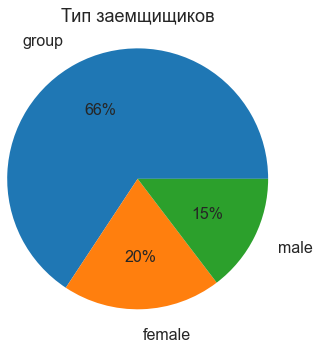

In [8]:
# отбор стран с крупными суммами займов

Gr_loans = df_kiva_loans[df_kiva_loans['funded_amount'] >= 5000][['sector', 'country', 'borrower_genders']]
Gr_loans.info()

# построение диаграммы по типу заемщиков в данной выборке

Gr_borrowers = Gr_loans['borrower_genders'].value_counts()
print(Gr_borrowers)
plot = Gr_borrowers.plot.pie(fontsize=16, autopct='%1.0f%%', labeldistance=1.2, radius=1.5)
plt.title("Тип заемщищиков", fontsize=18, y = 1.2)
plt.show()

 

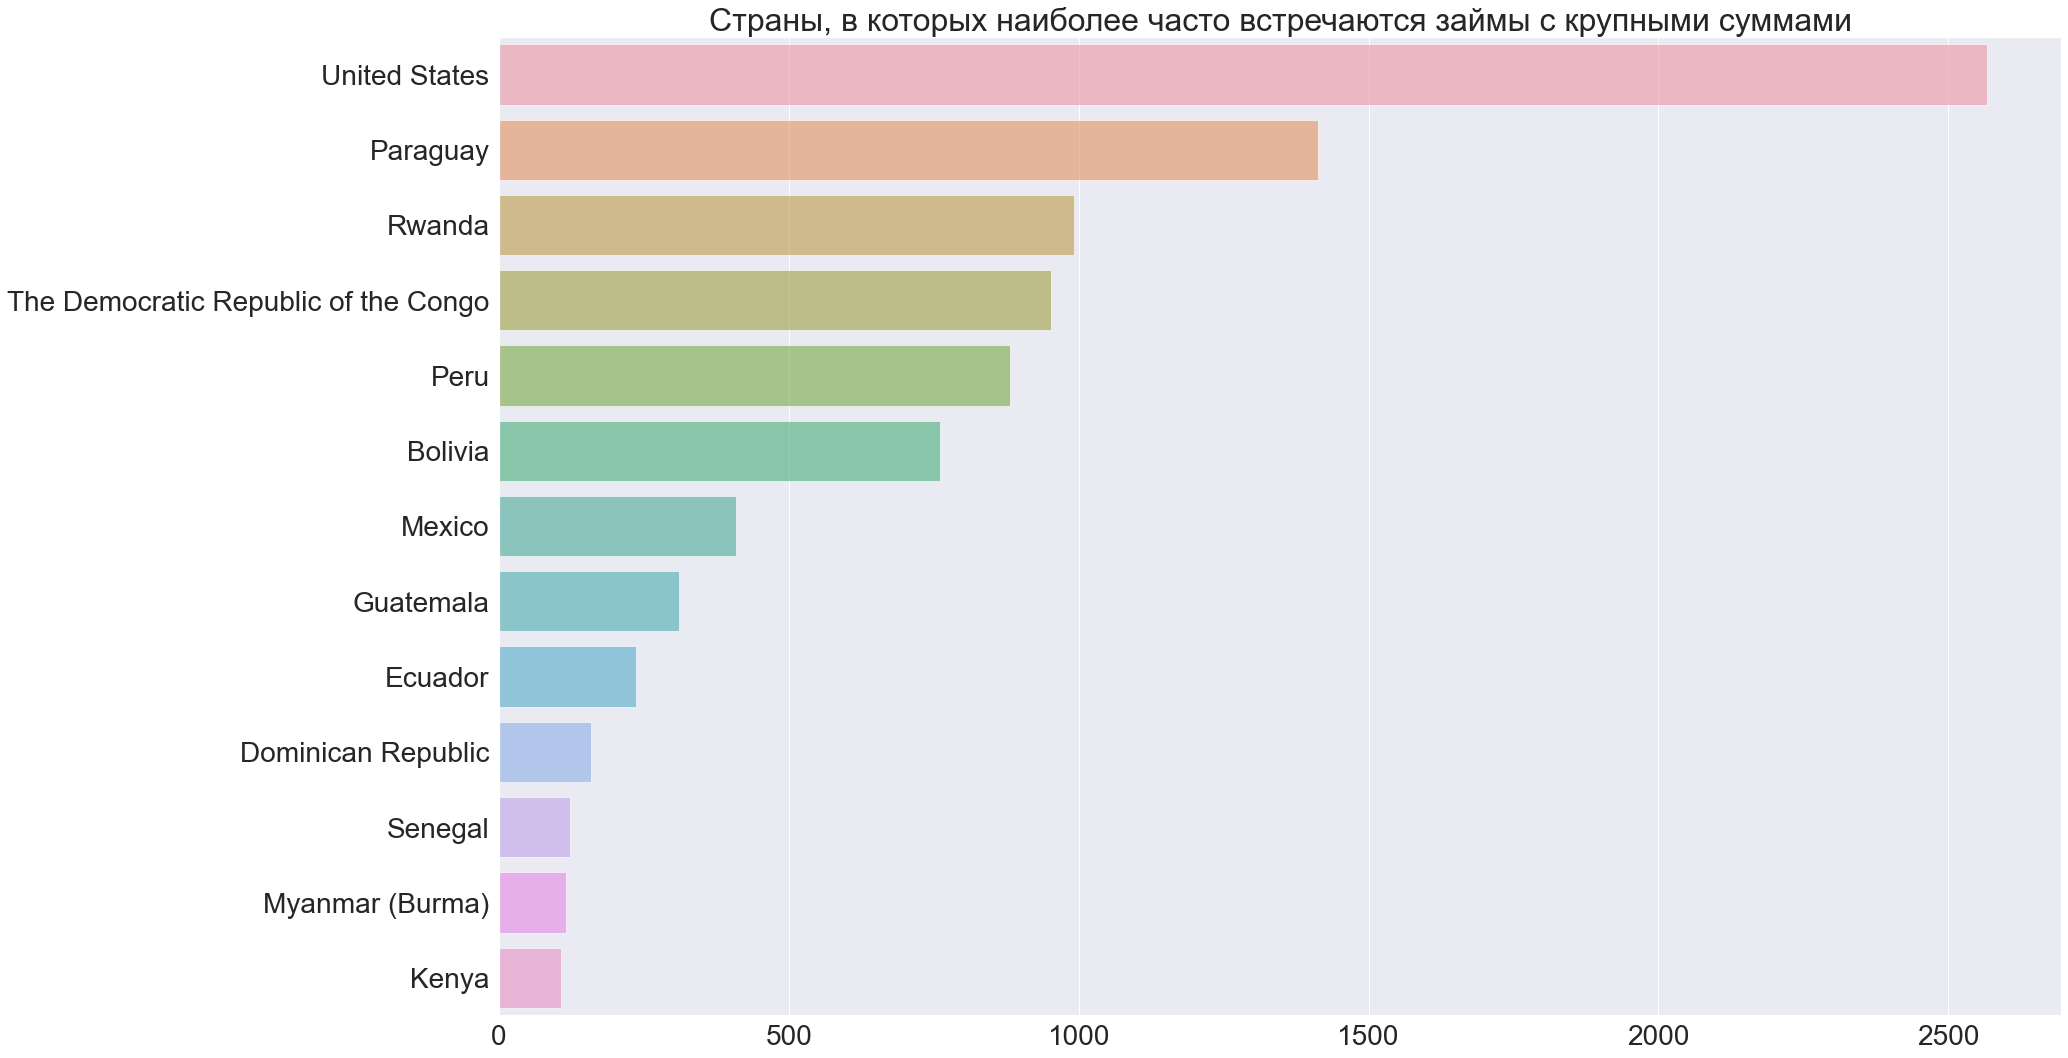

In [9]:
# Страны, в которых наиболее часто встречаются займы с крупными суммами
sns.set_theme(style="darkgrid")
con = Gr_loans['country'].value_counts()
con = con[con.values > 100]
plt.figure(figsize=(28, 18))
plt.title("Страны, в которых наиболее часто встречаются займы с крупными суммами", fontsize=32)
plt.tick_params(labelsize=28)
sns.barplot(y=con.index, x=con.values, alpha=0.6)
plt.show()


# par = ['sector', 'country', 'borrower_genders']



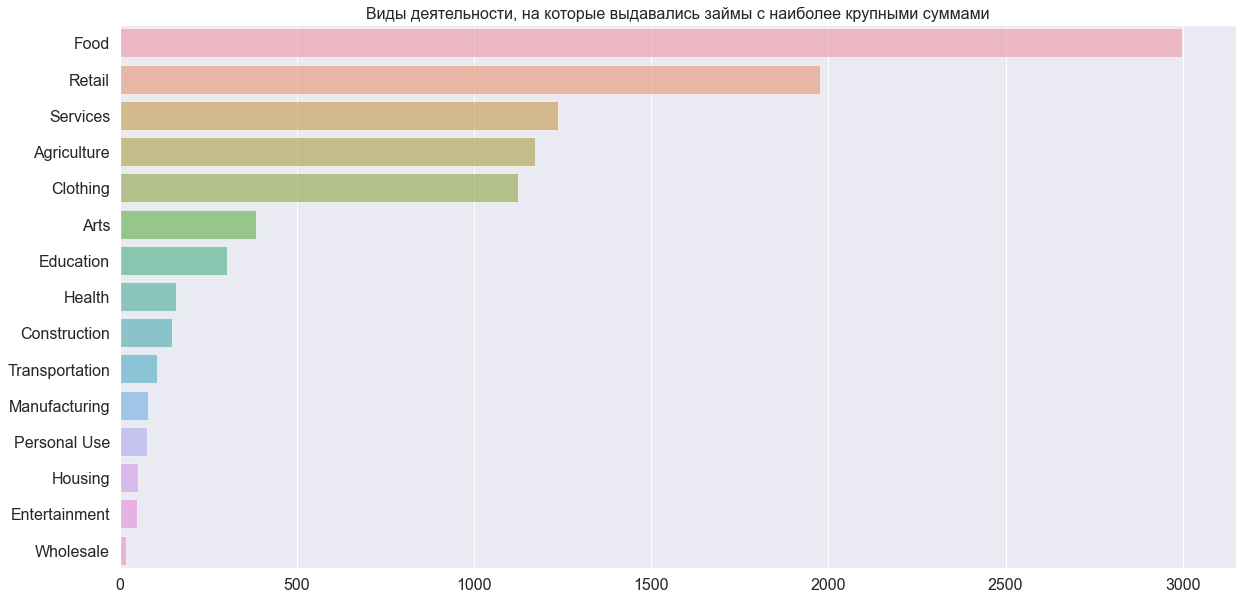

In [10]:
# Виды деятельности, на которые выдавались займы с наиболее крупными суммами
Gr_loans

sec = Gr_loans['sector'].value_counts()
sec 
plt.figure(figsize=(20, 10))
plt.title("Виды деятельности, на которые выдавались займы с наиболее крупными суммами", fontsize=16)
plt.tick_params(labelsize=16)
sns.barplot(y=sec.index, x=sec.values, alpha=0.6)
plt.show()

In [11]:
# учстанавливаем значения male, female, group в графу по заемщика и выполняем слияние датафреймов

def gen(gen):
    if gen == 'male':
        return 'male'
    elif gen == 'female':
        return 'female'
    else:
        return 'group'

df_kiva_loans['borrower_genders'].apply(gen)

df_mpi_grouped = df_mpi\
    .groupby(['ISO', 'country', 'world_region'])['MPI']\
    .mean()\
    .fillna(0)\
    .reset_index()
df_kiva_loans = df_kiva_loans.merge(df_mpi_grouped, how='left', on='country')

df_kiva_loans

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,...,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date,ISO,world_region,MPI
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,...,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01,PAK,South Asia,0.233167
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,...,2014-01-02 09:17:23+00:00,11.0,14,NaN,group,irregular,2014-01-01,PAK,South Asia,0.233167
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,...,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01,IND,South Asia,0.000000
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,...,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01,PAK,South Asia,0.233167
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,...,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01,PAK,South Asia,0.233167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671200,1340323,0.0,25.0,Livestock,Agriculture,"[True, u'para compara: cemento, arenya y ladri...",PY,Paraguay,Concepción,USD,...,NaN,13.0,0,NaN,female,monthly,2017-07-25,NaN,NaN,NaN
671201,1340316,25.0,25.0,Livestock,Agriculture,"[True, u'to start a turducken farm.'] - this l...",KE,Kenya,NaN,KES,...,2017-07-26 02:09:43+00:00,13.0,1,NaN,female,monthly,2017-07-25,KEN,Sub-Saharan Africa,0.209375
671202,1340334,0.0,25.0,Games,Entertainment,NaN,KE,Kenya,NaN,KES,...,NaN,13.0,0,NaN,group,monthly,2017-07-26,KEN,Sub-Saharan Africa,0.209375
671203,1340338,0.0,25.0,Livestock,Agriculture,"[True, u'to start a turducken farm.'] - this l...",KE,Kenya,NaN,KES,...,NaN,13.0,0,NaN,female,monthly,2017-07-26,KEN,Sub-Saharan Africa,0.209375


In [12]:
# Наблюдаемое отклонение от среднего
dev = (df_kiva_loans['loan_amount']-df_kiva_loans['loan_amount'].mean()).abs()
print(dev)
print(type(dev))
# Стандартное отклонение
std = df_kiva_loans['loan_amount'].std()
print(std)
print(type(std))
# Фильтруем исходный набор данных
df_kiva_loans_trimmed = df_kiva_loans[~(dev > 3 * std)]
df_kiva_loans_trimmed.head()

# plt.figure(figsize=(20,10))
# plt.title("Распределение суммы займа (без выбросов)", fontsize=16)
# plt.tick_params(labelsize=14)
# plt.xticks(np.arange(0, max(df_kiva_loans_trimmed['loan_amount']+1), 200))

# sns.distplot(df_kiva_loans_trimmed['loan_amount'], axlabel=False)
# plt.show()

0         542.397107
1         267.397107
2         692.397107
3         642.397107
4         442.397107
             ...    
671200    817.397107
671201    817.397107
671202    817.397107
671203    817.397107
671204    817.397107
Name: loan_amount, Length: 671205, dtype: float64
<class 'pandas.core.series.Series'>
1198.6600728834771
<class 'float'>


,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,...,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date,ISO,world_region,MPI
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,...,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01,PAK,South Asia,0.233167
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,...,2014-01-02 09:17:23+00:00,11.0,14,NaN,group,irregular,2014-01-01,PAK,South Asia,0.233167
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,...,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01,IND,South Asia,0.000000
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,...,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01,PAK,South Asia,0.233167
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,...,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01,PAK,South Asia,0.233167


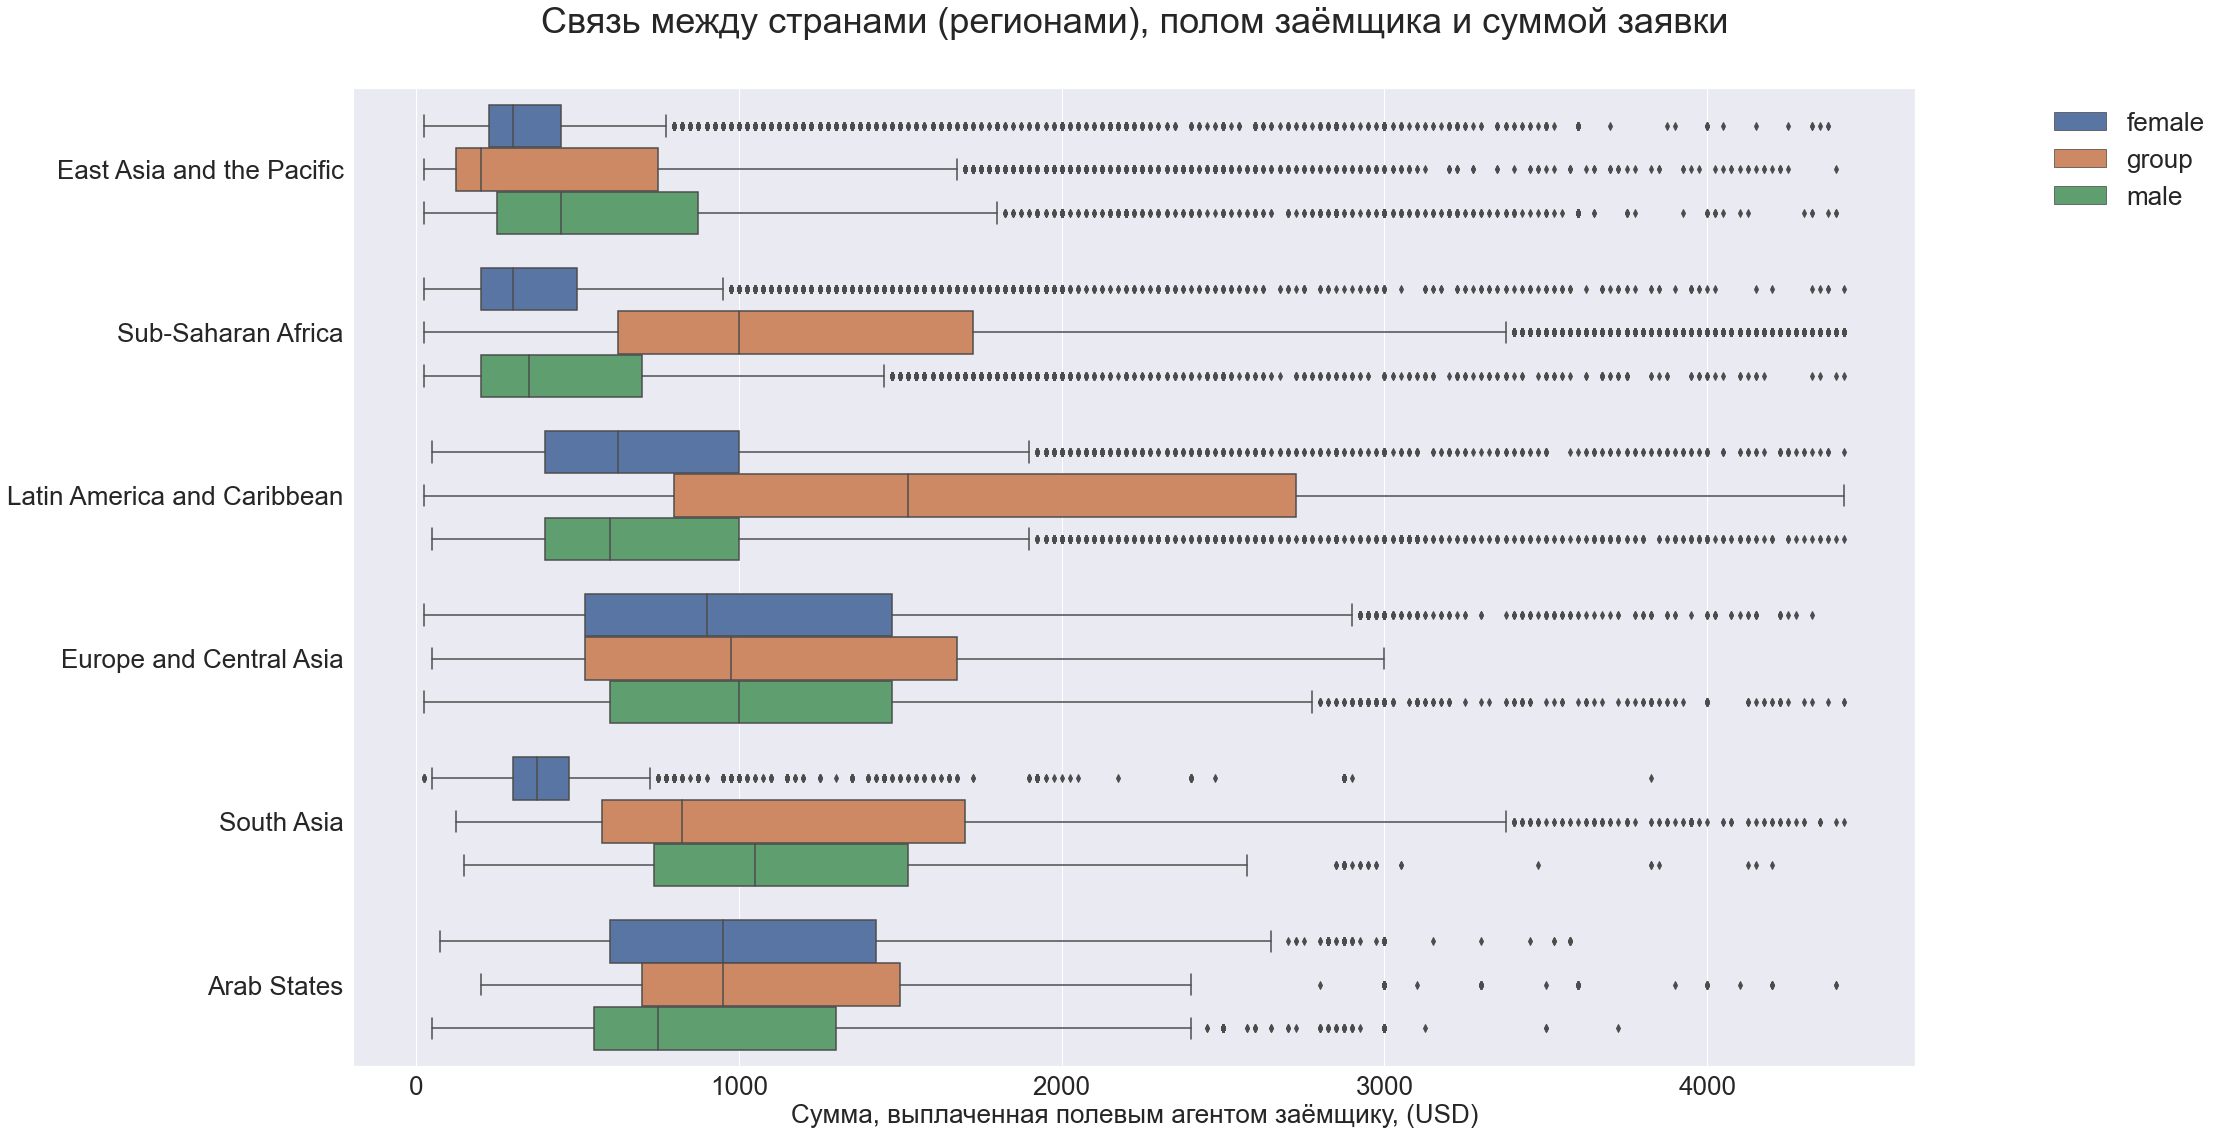

In [13]:
#связь между странами (регионами), полом заёмщика и суммой заявки

regions = df_kiva_loans_trimmed['world_region'].value_counts()
regions_list = regions.index.to_list()

plt.figure(figsize=(28,18))
plt.title("Связь между странами (регионами), полом заёмщика и суммой заявки", fontsize = 36, y = 1.05)
plt.tick_params(labelsize=26)
sns.boxplot(x='loan_amount', y="world_region",\
    hue='borrower_genders', order=regions_list, data=df_kiva_loans_trimmed)\
    .set(ylabel=None, xlabel=None)
plt.legend(loc=1, bbox_to_anchor=(1.2, 1), fontsize = 26)
plt.xlabel('Cумма, выплаченная полевым агентом заёмщику, (USD)', fontsize = 26)
plt.show()


In [14]:
#Зависимость пола заёмщика от региона планеты.

df_gender_by_reg = \
    df_kiva_loans_trimmed[df_kiva_loans_trimmed['country'].isin(countries.index.values)]\
    .groupby(['world_region', 'borrower_genders'])['borrower_genders']\
    .count()\
    .groupby(level=0).apply(lambda x: 100 * x / x.sum())\
    .unstack('borrower_genders')\
    .fillna(0)
df_gender_by_reg['region'] = df_gender_by_reg.index
df_gender_by_reg


borrower_genders,female,group,male,region
world_region,,,,
Arab States,63.625450,1.824730,34.549820,Arab States
East Asia and the Pacific,80.856652,13.418267,5.725081,East Asia and the Pacific
Europe and Central Asia,74.048117,0.212020,25.739863,Europe and Central Asia
Latin America and Caribbean,55.081014,10.767415,34.151571,Latin America and Caribbean
South Asia,85.730804,11.352289,2.916908,South Asia
Sub-Saharan Africa,55.315628,17.995237,26.689135,Sub-Saharan Africa


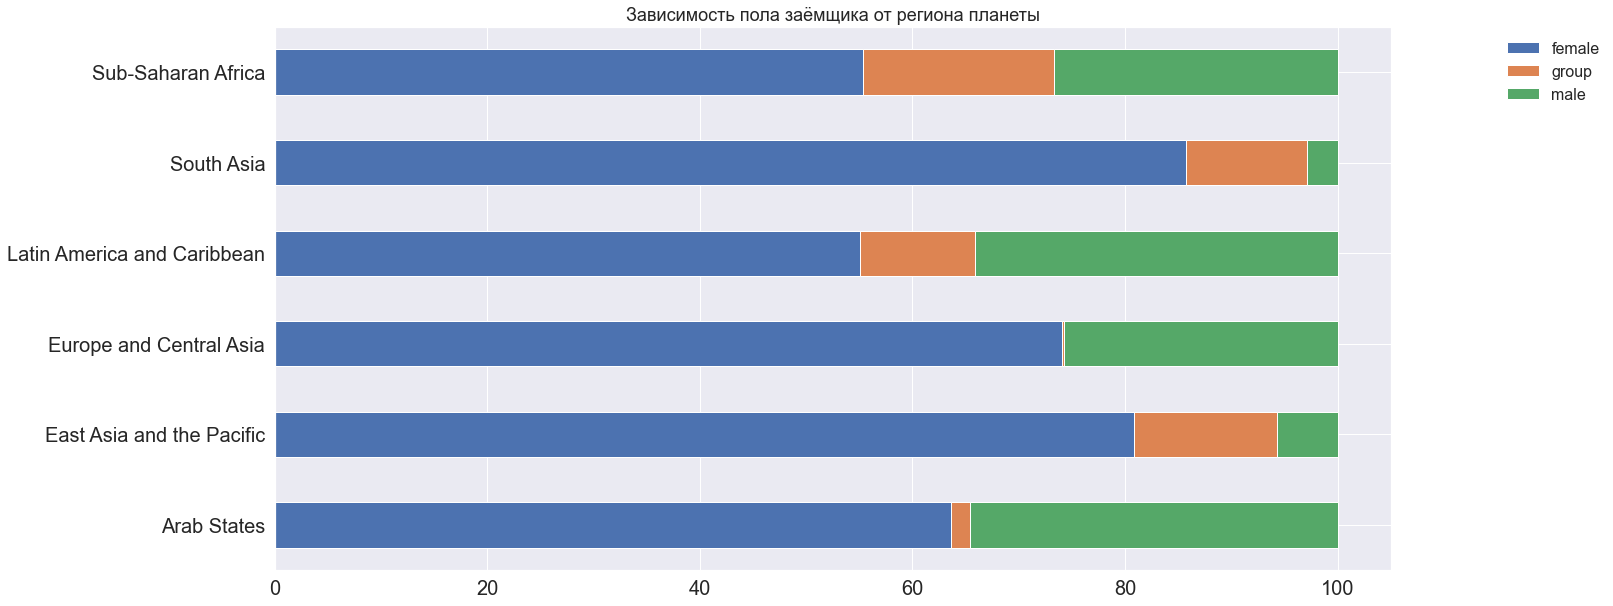

In [15]:
plot = df_gender_by_reg.plot.barh(
        figsize=(20,10)
        , fontsize=20
        , stacked=True
        , title='Зависимость пола заёмщика от региона планеты')
plot.title.set_size(18)
plot.legend(loc=1, bbox_to_anchor=(1.2, 1), fontsize=16)
plot.set(ylabel=None, xlabel=None)
plt.show()

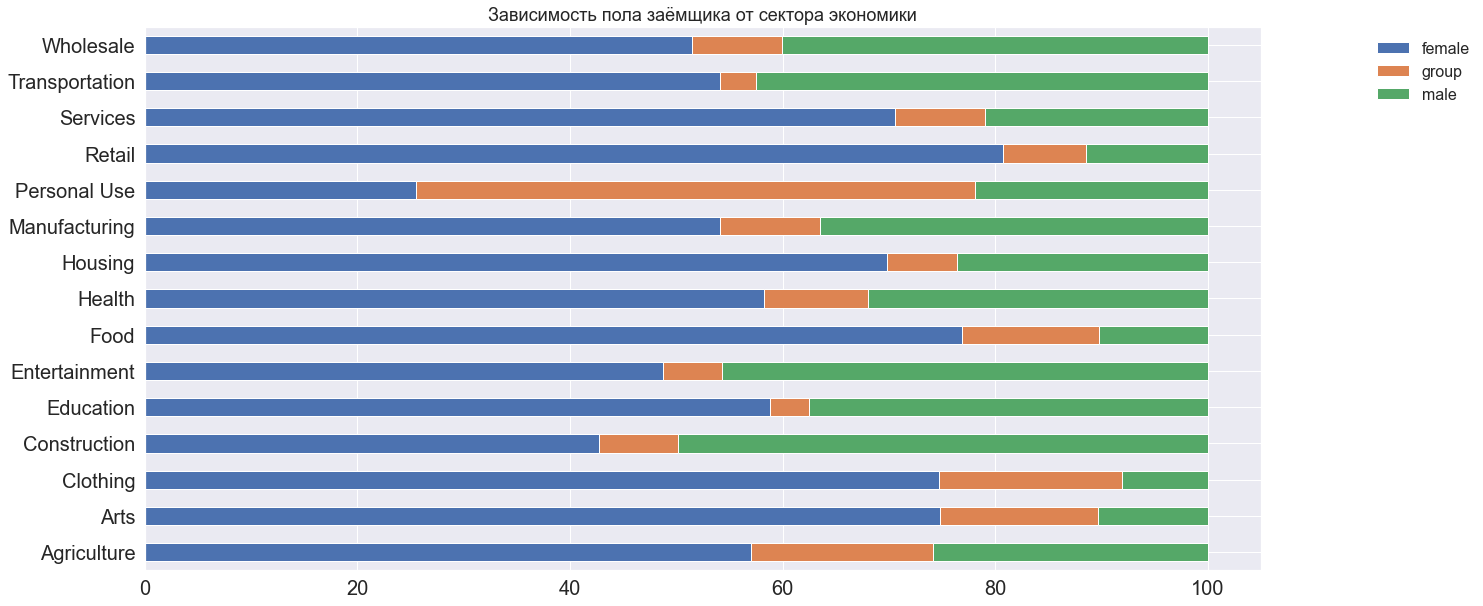

In [16]:
# Зависимость пола заёмщика от сектора экономики

df_gender_by_sec = \
    df_kiva_loans_trimmed[df_kiva_loans_trimmed['country'].isin(countries.index.values)]\
    .groupby(['sector', 'borrower_genders'])['borrower_genders']\
    .count()\
    .groupby(level=0).apply(lambda x: 100 * x / x.sum())\
    .unstack('borrower_genders')\
    .fillna(0)
plot = df_gender_by_sec.plot.barh(
        figsize=(20,10)
        , fontsize=20
        , stacked=True
        , title='Зависимость пола заёмщика от сектора экономики')
plot.title.set_size(18)
plot.legend(loc=1, bbox_to_anchor=(1.2, 1), fontsize=16)
plot.set(ylabel=None, xlabel=None)
plt.show()


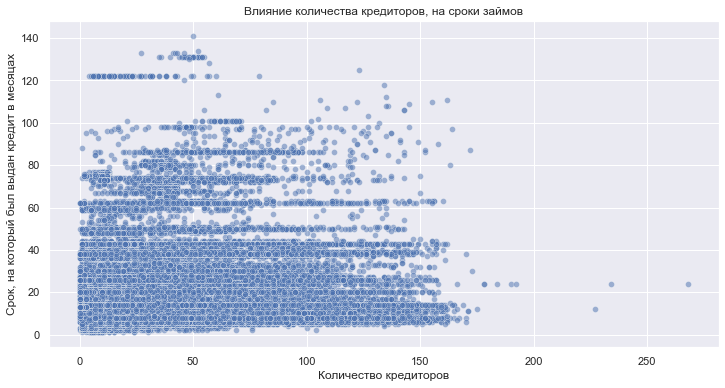

In [17]:
# Влияние такого атрибута займа, как Количество кредиторов (lender_count), на суммы и сроки займов

fig, ax = plt.subplots(figsize=(12, 6))

sns.scatterplot(data=df_kiva_loans_trimmed, x='lender_count', y='term_in_months', alpha=0.5)
ax.set_title('Влияние количества кредиторов, на сроки займов')
ax.set_xlabel('Количество кредиторов')
ax.set_ylabel('Cрок, на который был выдан кредит в месяцах');


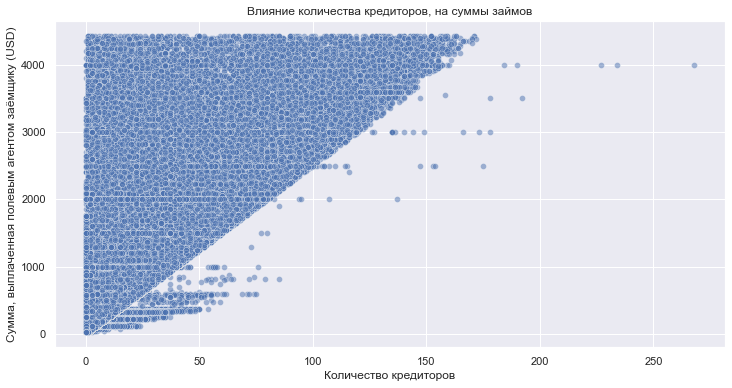

In [18]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.scatterplot(data=df_kiva_loans_trimmed, x='lender_count', y='loan_amount', alpha=0.5)
ax.set_title('Влияние количества кредиторов, на суммы займов')
ax.set_xlabel('Количество кредиторов')
ax.set_ylabel('Сумма, выплаченная полевым агентом заёмщику (USD)');

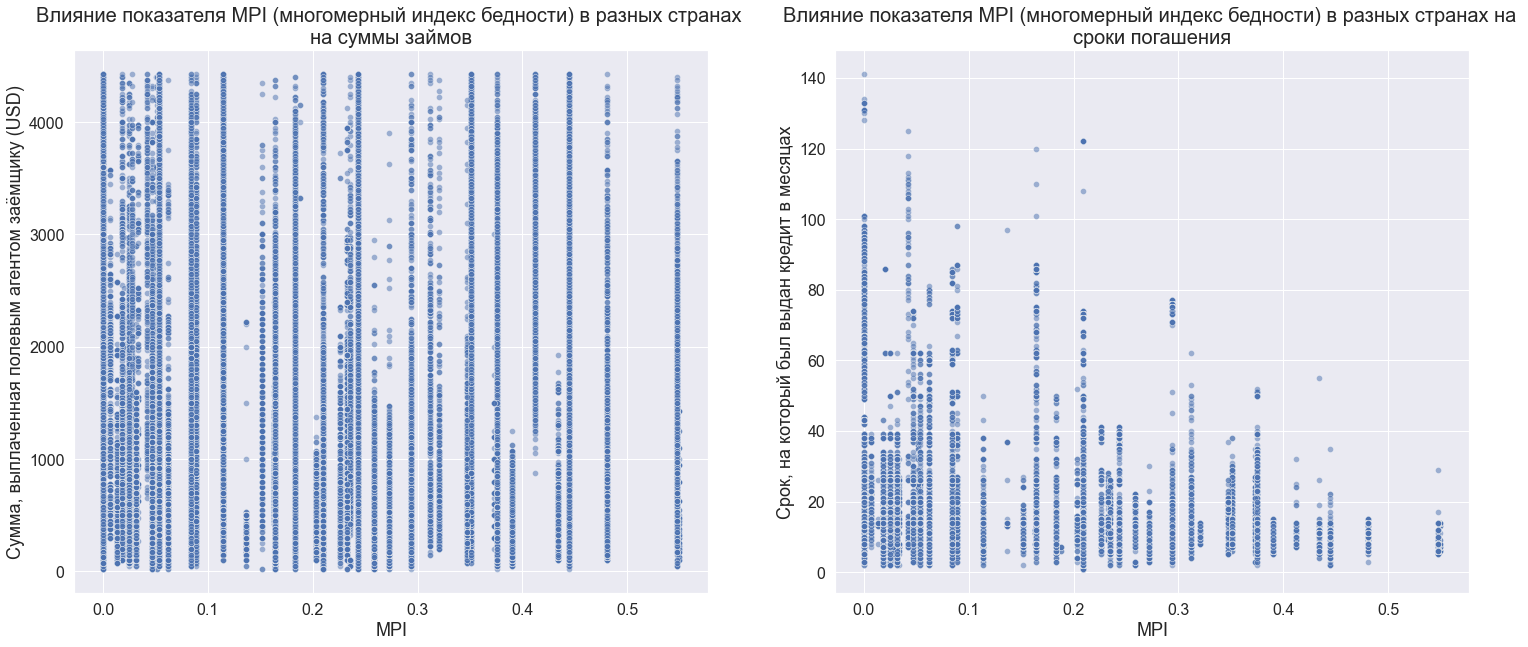

In [19]:
# Влияние показателя MPI (многомерный индекс бедности) в разных странах на суммы займов и сроки погашения.

fig, axs = plt.subplots(1, 2, figsize=(25,10))

sns.scatterplot(data=df_kiva_loans_trimmed, x='MPI', y='loan_amount', alpha=0.5, ax = axs[0])
axs[0].set_title("Влияние показателя MPI (многомерный индекс бедности) в разных странах \nна суммы займов", fontsize=20)
axs[0].set_xlabel('MPI', fontsize=18)
axs[0].set_ylabel('Сумма, выплаченная полевым агентом заёмщику (USD)', fontsize=18)
axs[0].tick_params(labelsize=16)

sns.scatterplot(data=df_kiva_loans_trimmed, x='MPI', y='term_in_months', alpha=0.5, ax = axs[1])
axs[1].set_title("Влияние показателя MPI (многомерный индекс бедности) в разных странах на \nсроки погашения", fontsize=20)
axs[1].set_xlabel('MPI', fontsize=18)
axs[1].set_ylabel('Cрок, на который был выдан кредит в месяцах', fontsize=18)
axs[1].tick_params(labelsize=16);

In [20]:
# Формирование колонки «Время финансирования заявки» или time_funding
# drop na (missing) values
df_loans_dates = df_kiva_loans_trimmed.dropna(subset=['disbursed_time', 'funded_time'], how='any', inplace=False)

# # dates columns:
dates = ['posted_time','disbursed_time']

# # format dates:
df_loans_dates[dates] = df_loans_dates[dates].applymap(lambda x : x.split('+')[0])
df_loans_dates[dates] = df_loans_dates[dates].apply(pd.to_datetime)

# # calculate time interval
df_loans_dates.loc[:, 'time_funding'] = df_loans_dates['disbursed_time']-df_loans_dates['posted_time']
df_loans_dates.loc[:, 'time_funding'] = df_loans_dates['time_funding'] / timedelta(days=1) 

# # remove outliers +-3 sigma
dev = (df_loans_dates['time_funding']-df_loans_dates['time_funding'].mean()).abs()
std = df_loans_dates['time_funding'].std()
# # Keep rows where time_funding interval > 0 only
df_loans_dates_trimmed = df_loans_dates[~(dev>3*std) & (df_loans_dates.loc[:, 'time_funding']>0)]
df_loans_dates_trimmed.info()

C:\AS\anaconda\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


<class 'pandas.core.frame.DataFrame'>
Int64Index: 27989 entries, 5 to 669168
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  27989 non-null  int64         
 1   funded_amount       27989 non-null  float64       
 2   loan_amount         27989 non-null  float64       
 3   activity            27989 non-null  object        
 4   sector              27989 non-null  object        
 5   use                 27722 non-null  object        
 6   country_code        27985 non-null  object        
 7   country             27989 non-null  object        
 8   region              22882 non-null  object        
 9   currency            27989 non-null  object        
 10  partner_id          23294 non-null  float64       
 11  posted_time         27989 non-null  datetime64[ns]
 12  disbursed_time      27989 non-null  datetime64[ns]
 13  funded_time         27989 non-null  object   

C:\AS\anaconda\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\AS\anaconda\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


<ipython-input-21-c7af821ac704>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loans_dates_trimmed['monthly_payment'] = df_loans_dates_trimmed['loan_amount'] / df_loans_dates_trimmed['term_in_months']


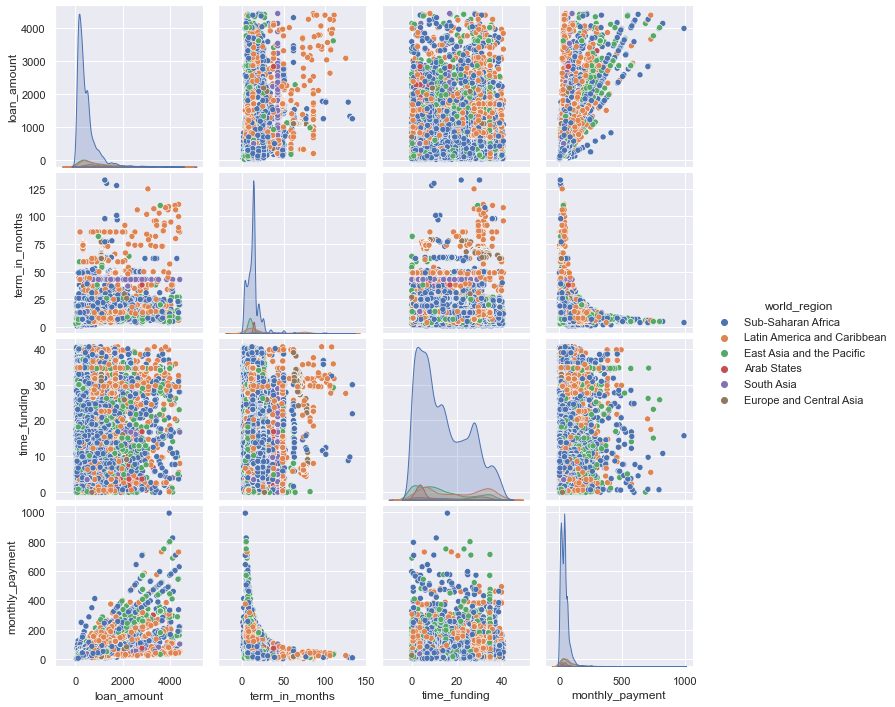

In [21]:

# Формирование колонки ежемесячного платежа

df_loans_dates_trimmed['monthly_payment'] = df_loans_dates_trimmed['loan_amount'] / df_loans_dates_trimmed['term_in_months']
metrics = ['loan_amount', 'term_in_months', 'time_funding', 'monthly_payment', 'world_region']

tmp_df = df_loans_dates_trimmed[metrics]

# Зависимости таких метрик, как «Сумма займа», «Срок займа», «Время финансирования заявки», 
# «Ежемесячный платёж», в разрезе макрорегионов.

sns.pairplot(tmp_df, hue='world_region');